In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline
from IPython.display import Image, display
from matplotlib.colors import ListedColormap

In [3]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url) #Read CSV file into DataFrame

In [4]:
titanic.head() #Returns the first 5 rows of titanic dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.columns #Columns of titanic dataframe

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.info() #Prints information about titanic DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
titanic.describe() #The summary statistics of the titanic dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.shape #Return a tuple representing the dimensionality of titanic DataFrame.

(891, 12)

In [9]:
titanic.isnull().values.any() #Check for any NA’s in the dataframe.

True

In [10]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


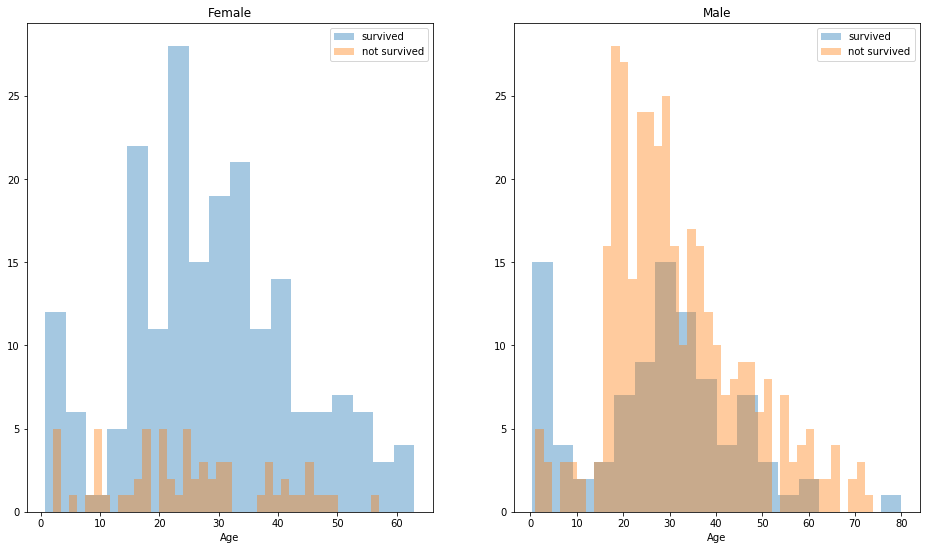

In [11]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 9))
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sb.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sb.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sb.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sb.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

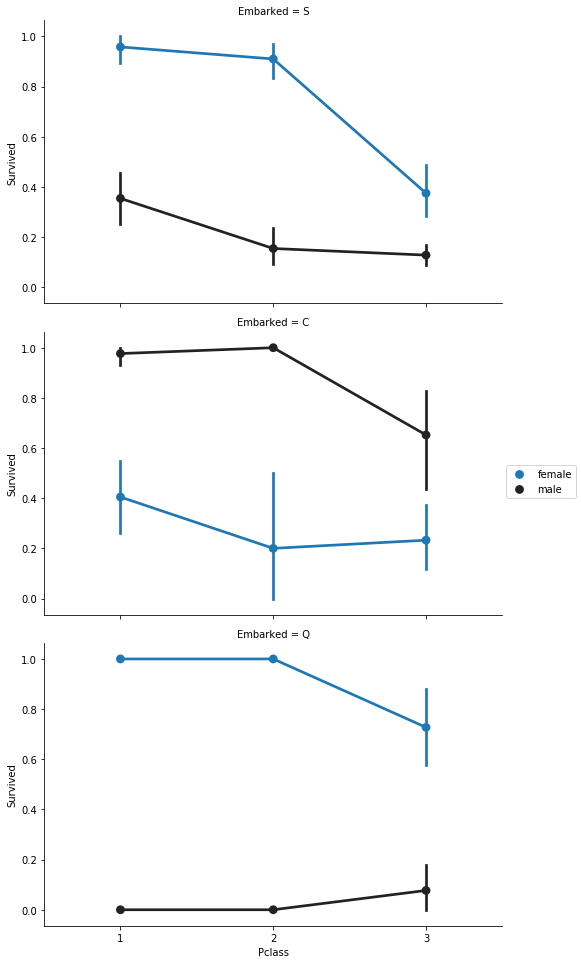

In [12]:
FacetGrid = sb.FacetGrid(titanic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sb.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

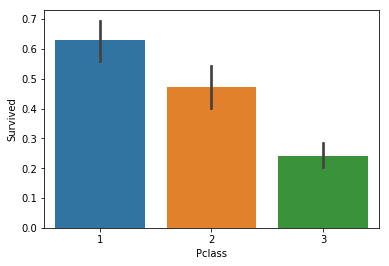

In [13]:
sb.barplot(x='Pclass', y='Survived', data=titanic)

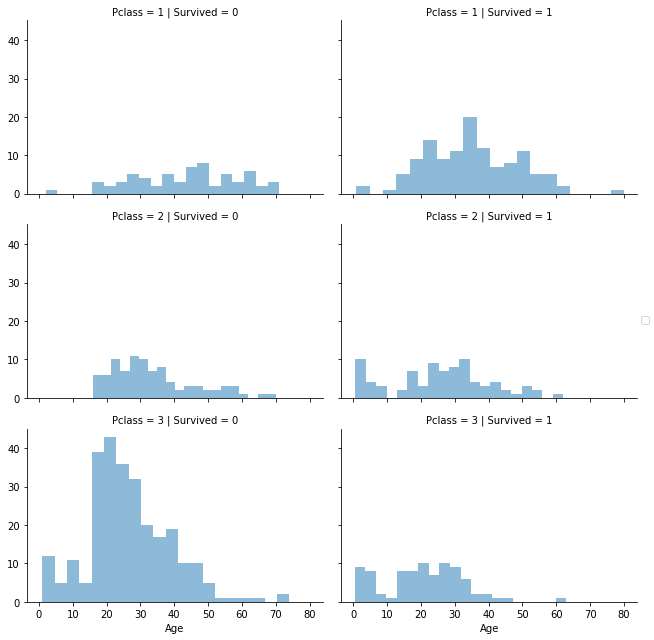

In [14]:
grid = sb.FacetGrid(titanic, col='Survived', row='Pclass', size=3, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [15]:
titanic_temp = titanic
titanic_temp['relatives'] = titanic_temp['SibSp'] + titanic_temp['Parch']
titanic_temp.loc[titanic_temp['relatives'] > 0, 'not_alone'] = 0
titanic_temp.loc[titanic_temp['relatives'] == 0, 'not_alone'] = 1
titanic_temp['not_alone'] = titanic_temp['not_alone'].astype(int)
titanic_temp['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

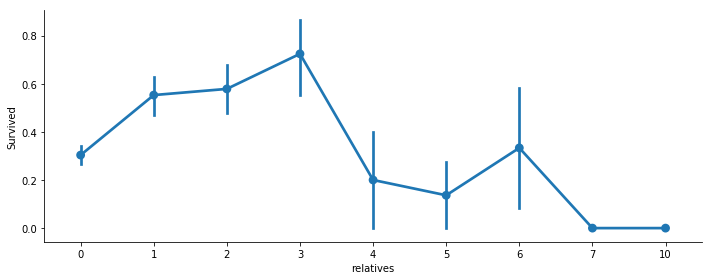

In [16]:
axes = sb.factorplot('relatives','Survived', data=titanic_temp, aspect = 2.5, )

In [17]:
titanic_new = titanic

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

titanic_new['Cabin'] = titanic_new['Cabin'].fillna("U0")
titanic_new['Deck'] = titanic_new['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
titanic_new['Deck'] = titanic_new['Deck'].map(deck)
titanic_new['Deck'] = titanic_new['Deck'].fillna(0)
titanic_new['Deck'] = titanic_new['Deck'].astype(int)

#I will now drop the cabin feature
titanic_new = titanic_new.drop(['Cabin'], axis=1)

In [18]:
mean = titanic_new["Age"].mean()
std = titanic_new["Age"].std()
is_null = titanic_new["Age"].isnull().sum()

#Computing random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

#Filling NaN values in Age column with random values generated
age_slice = titanic_new["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic_new["Age"] = age_slice
titanic_new["Age"] = titanic_new["Age"].astype(int)

In [19]:
titanic_new["Age"].isnull().sum() #Check for any null in the Age column.

0

In [20]:
titanic_new['Embarked'].describe()  #The summary statistics of the Embarked column

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
common_value = 'S' #By Observing the Embarked column
titanic_new['Embarked'] = titanic_new['Embarked'].fillna(common_value)

In [22]:
titanic_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
Deck           891 non-null int32
dtypes: float64(1), int32(3), int64(6), object(4)
memory usage: 73.1+ KB


In [23]:
titanic_new.isnull().values.any()

False

In [24]:
genders = {"male": 1, "female": 0}
titanic_new['Sex'] = titanic_new['Sex'].map(genders)

In [25]:


titanic_new['Fare'] = titanic_new['Fare'].fillna(0)
titanic_new['Fare'] = titanic_new['Fare'].astype(int)

In [26]:
titanic_new.info() #Prints information about titanic_new DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int32
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
Deck           891 non-null int32
dtypes: int32(4), int64(7), object(3)
memory usage: 73.1+ KB


In [27]:
titanic.head() #Returns the first 5 rows of the titanic dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,1,8


In [28]:
titanic_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7,S,1,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71,C,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7,S,0,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53,S,1,0,3
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8,S,0,1,8


In [29]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone,Deck
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694,6.936027
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615,2.074282
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,8.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,8.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,8.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,8.000000


In [30]:
titanic_new.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone,Deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.572391,0.523008,0.381594,31.785634,0.904602,0.602694,6.936027
std,257.353842,0.486592,0.836071,0.477990,13.552730,1.102743,0.806057,49.703730,1.613459,0.489615,2.074282
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.000000,0.000000,0.000000,8.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.000000,0.000000,1.000000,8.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,8.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.000000,10.000000,1.000000,8.000000


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
Deck           891 non-null int32
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 80.1+ KB


In [32]:
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int32
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
Deck           891 non-null int32
dtypes: int32(4), int64(7), object(3)
memory usage: 73.1+ KB


In [33]:


#Selecting features
X = titanic_new[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']] 
Y = titanic_new['Survived']



In [37]:
#Spliting data randomly into 70% training and 30% test
from sklearn import tree, metrics, model_selection, preprocessing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape) #Training data shape (predictor values) : 70%
print(X_test.shape) #Test data shape (predictor values) : 30%
print(Y_train.shape) #Training data shape (target values) : 70%
print(Y_test.shape) #Test data shape (target values) : 30%

(623, 6)
(268, 6)
(623,)
(268,)


In [39]:
#Training the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [40]:
#Using the model to make predictions with the test data
Y_pred = dtree.predict(X_test)

In [41]:
Y_pred.shape

(268,)

In [42]:
Y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [46]:
conda install -c conda-forge pydotplus 

SyntaxError: invalid syntax (<ipython-input-46-50f540614a8d>, line 1)